# Intro
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of \\$3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
2. What metric would you report for this dataset?
3. What is its value?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('data_set.csv')

In [3]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
len(df)

5000

In [5]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


### Question 1
What's going wrong with the data is the largest order is worth \\$704,000 and the smallest is \\$90, which is probably just one pair of sneakers. **The Average Order Value doesn't take into account how many items are ordered.**

Let's see what it looks like where the high order amounts are

In [6]:
df[df['order_amount'] > 700000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


Notice that the largest orders were all from `shop_id` 42 and that shop had 2000 total items.

In [7]:
704000/2000

352.0

For these orders, the items averaged \\$352 per item. It says in the instructions that each store sells only one type of shoe. I'll make a new df with this as a column. 

In [8]:
df['item_cost'] = df.order_amount / df.total_items

In [9]:
df.item_cost.describe()

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
Name: item_cost, dtype: float64

Sounds OK, but why does an item cost more than \\$25,000?  

There must be diamonds on the soles of those shoes.

In [10]:
df[df.item_cost > 25000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_cost
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,25725.0
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,25725.0
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26,25725.0
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21,25725.0
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20,25725.0


In [11]:
len(df[df.item_cost > 25000])

46

There are 46 instances of super-expensive items sold by `shop_id` 78. What about a little less than that?

In [12]:
df[(df.item_cost > 15000) & (df.item_cost < 20000)]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_cost


There is nothing between \\$15,000 and \\$20,000. I'll make a box plot to visualize the total range of this metric.

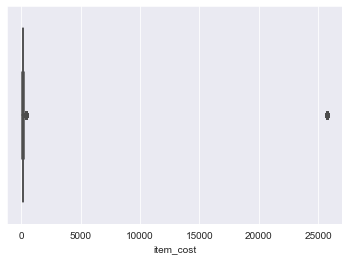

In [13]:
sns.boxplot(x=df['item_cost'], color='r')
plt.show()

Yes, indeed, that is a big outlier. Probably an error. I'll remove it from the dataframe.

In [14]:
df = df[df.item_cost < 20000]

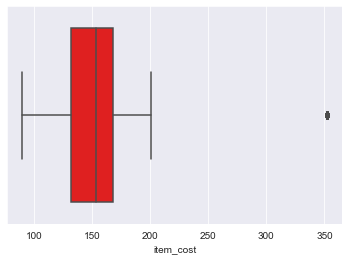

In [15]:
sns.boxplot(x=df['item_cost'], color='r')
plt.show()

There's still a pair of sneakers that costs more than \\$350, but that's still within the realm of possiblity

In [16]:
df.item_cost.describe()

count    4954.000000
mean      152.475575
std        31.260218
min        90.000000
25%       132.000000
50%       153.000000
75%       168.000000
max       352.000000
Name: item_cost, dtype: float64

Of course, I would want to investigate this `shop_id` 78 and see why its items are such outliers, but for the purpose of this exercise, I'll assume that there's an error. Because it's only 46 items out of 5000, removing them won't affect my calculations much.

### Questions 2 and 3
2. The metric would be `item_cost` which equals `order_amount` / `total_items`.
3. This metric has a mean of \\$152.48, a min of \\$90 and a max of \\$352.

